## WHO Maternal Mortality Data Exploration
### Introduction
Maternal health, encompassing the well-being of women during pregnancy, childbirth, and the postnatal period, remains a critical global concern. Despite advancements over the past two decades, the toll of maternal mortality persists at an alarming rate. In 2020 alone, approximately 287,000 women lost their lives due to complications arising from pregnancy and childbirth, a figure deemed unacceptably high by global health agencies[[1](https://www.who.int/health-topics/maternal-health#tab=tab_1)].

The leading causes of maternal mortality include direct factors such as excessive blood loss, infections, high blood pressure, unsafe abortion, and obstructed labor, alongside indirect factors like anemia, malaria, and heart disease. Distressingly, most of these deaths are preventable with timely intervention by skilled healthcare professionals in supportive environments. Addressing these disparities requires a multifaceted approach. Poverty often intertwines with poor reproductive health outcomes, as marginalized groups struggle to access antenatal and postpartum care[[2](https://www.who.int/europe/news-room/fact-sheets/item/maternal-and-newborn-health)]. Furthermore, the dynamics of maternal mortality vary across regions. 

Efforts to combat maternal mortality must extend beyond mere survival to encompass comprehensive care that promotes health and well-being. Central to this endeavor is ensuring equitable access to quality maternity care, addressing systemic inequalities, and safeguarding sexual and reproductive health rights. With the overarching goal of ending preventable maternal deaths, this project aims to explore maternal health data, shedding light on critical insights and the admirable progress made over the last documented 20 years.

### Data collection
Considering that the main page on Maternal health lists infections, high blood pressure, unsafe abortion, and obstructed labor, alongside indirect factors like anemia, malaria, and heart disease as the most common causes of maternal injury and death, I will use these to guide my selection of indicators, while also considering markers related to poverty, underdevelopment, and access to antenatal and postpartum care. Souza et al does a great job bringing indirect social factors to the table in their systematic review, which I will also be considering for my data collection[[3](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(23)00468-0/fulltext)].

The analysts at WHO have done a phenomenal job aggregating data and developing estimates in their 2023 publication on maternal health over 2000 to 2020 such that I could not begin to replicate; as such I will be using data pulled primarily from the WHO MATERNAL, NEWBORN, CHILD AND ADOLESCENT HEALTH AND AGEING data portal, and developing visualizations for longitudinal global progress and doing some correlation investigation of my own[[4](https://www.who.int/publications/i/item/9789240068759)][[5](https://platform.who.int/data/maternal-newborn-child-adolescent-ageing/indicator-explorer-new)]. You can view their 2000-2020 MMR visualizations [here](https://mmr2020.srhr.org/data) [[6](https://mmr2020.srhr.org/data)].

I looked at all the indicators and selected only the quantitative ones related to maternal health and environmental/economic conditions that may have a relationship. I chose to not include any indicators related to neonatal health or the under-5 population for pertinence and brevity. I thought the policy indicators were interesting, but not relevant to any correlation explorations because most if not all of the data is boolean, rather than numeric data. This would be interesting for a visualization split.

Here is a look of the indicators I pulled from the portal; metadata can be accessed directly from the data portal link above.

- Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)

Maternal health conditions
- Antenatal care coverage - at least four visits (%)
- Proportion of births delivered in a health facility
- Proportion of births attended by skilled health personnel (SDG 3.1.2)
- Proportion of women accessing antenatal care services who were tested for syphilis
- Proportion of mothers who had postnatal contact with a health provider within 2 days of delivery
- Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (SDG 3.7.1)
- Contraceptive prevalence - any modern method (among women aged 15-49 years)
- Prevalence of anaemia in non-pregnant women aged 15-49 years (%) (SDG 2.2.3)
- Prevalence of anaemia in pregnant women aged 15-49 years (%) (SDG 2.2.3)
- Proportion of women with a live birth who received iron tablets or syrup during antenatal care

Social/economic conditions
- Crude death rate (deaths per 1000 population)
- Median age (years)
- Sex ratio at birth (male births per female births)
- Total fertility rate (live births per woman)
- Frequency of meetings of national panel to review maternal deaths
- Health expenditures on Maternal Conditions, in constant (2020) international \$ (PPP) per capita
- Health expenditures on Contraceptive Management (Family Planning), in constant (2020) international \$ (PPP) per capita
- Health expenditures on Reproductive Health, in constant (2020) international \$ (PPP) per capita
- Proportion of population below the international poverty line (SDG 1.1.1)
- Population using at least basic drinking-water services (%) (SDG 6.1.1)
- Population using at least basic sanitation services (%) (SDG 6.2.1)
- Proportion of population using improved water supplies
- Proportion of population using improved sanitation facilities (excluding shared)
- Proportion of handwashing facility on premises with soap and water (SDG 6.2.1)

I wanted to use the indicator "Youth literacy rate, population 15-24 years (%)", but it seems the data is relatively sparse and focused on just a couple regions with little to no country data. Data download from this portal only allows for 10 indicators at once, so I completed it in 3 chunks, each one including maternal mortality, for a total of 25 indicators including maternal mortality.

Maternal mortality data stops at 2020; parallel to the WHO Trends in maternal mortality publication in 2023, I will be pulling data from the years 2000 to 2020.

### Preliminary data exploration, wrangling
WHO has aggregated their own data into annual Sustainable Development Goals (SDG) regional, income, and global chunks, but sparingly, likely dependent on completeness of data and relevance to the SDG missions.

In `maternaldata.xlsx`, the indicators that have global/regional data are Sex Ratio at Birth (every 5 years) and Total Fertility Rate (annual).<br>
In `maternaldata2.xlsx`, the indicators that have global/regional data are Crude Death Rate (annual) and Median Age (every 5 years).<br>
In `maternaldata3.xlsx`, the indicators that have global/regional data are Proportion of population below the international poverty line (annual 2000-2019), Proportion of population using improved sanitation facilities (annual 2009-2017), and Proportion of population using improved water supplies (annual 2009-2017).

Due to the sparse nature of the global/regional data, I will be aggregating my own regional/global data based on the WHO regions: Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, and Western Pacific.

In [42]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
# from matplotlib import rcParams

In [43]:
df=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata.csv")
df2=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata2.csv")
df3=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata3.csv")
mmn=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\mmn.csv")
mmr=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\mmr.csv")

C:\Users\Michelle Zhou\AppData\Local\Temp\ipykernel_7428\1196179545.py:2: DtypeWarning: Columns (3,5,8,11,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata2.csv")
C:\Users\Michelle Zhou\AppData\Local\Temp\ipykernel_7428\1196179545.py:3: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata3.csv")


In [44]:
print(df.columns.tolist())

['Indicator', 'Year', 'Country', 'Global', 'WHO region', 'SDG region', 'World bank income group', 'Age group', 'Measure', 'Residence area', 'Sex', 'Wealth quintile', 'Datasource short', 'Datasource long', 'Comments', 'Value Numeric', 'Value String', 'Value low', 'Value high']


In [45]:
print(df2.columns.tolist())

['Indicator', 'Year', 'Country', 'Global', 'WHO region', 'SDG region', 'World bank income group', 'Age group', 'Measure', 'Mother education', 'Residence area', 'SAB definition', 'Wealth quintile', 'Datasource short', 'Datasource long', 'Comments', 'Value Numeric', 'Value String', 'Value low', 'Value high']


In [46]:
print(df3.columns.tolist())

['Indicator', 'Year', 'Country', 'Global', 'WHO region', 'SDG region', 'World bank income group', 'Imp. sanitation', 'Imp. water', 'Residence area', 'Sex', 'Comments', 'Value Numeric', 'Value String', 'Value low', 'Value high']


In [47]:
df.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                      object
WHO region                  object
SDG region                  object
World bank income group     object
Age group                   object
Measure                     object
Residence area              object
Sex                         object
Wealth quintile             object
Datasource short            object
Datasource long             object
Comments                    object
Value Numeric              float64
Value String                object
Value low                  float64
Value high                 float64
dtype: object

In [48]:
df2.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                      object
WHO region                  object
SDG region                  object
World bank income group     object
Age group                   object
Measure                     object
Mother education            object
Residence area              object
SAB definition              object
Wealth quintile             object
Datasource short            object
Datasource long             object
Comments                    object
Value Numeric              float64
Value String                object
Value low                  float64
Value high                 float64
dtype: object

In [49]:
df3.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                      object
WHO region                  object
SDG region                 float64
World bank income group     object
Imp. sanitation             object
Imp. water                  object
Residence area              object
Sex                        float64
Comments                   float64
Value Numeric              float64
Value String                object
Value low                  float64
Value high                 float64
dtype: object

In [50]:
# changing numeric values of maternal death panel frequency since they are codes and not actual values that represent numeric data
df.loc[df['Value String'] == 'Does not apply', 'Value Numeric'] = 0
df.loc[df['Value String'] == 'Unknown', 'Value Numeric'] = float('nan')
df.loc[df['Value String'] == 'ANNUALLY', 'Value Numeric'] = 1
df.loc[df['Value String'] == 'SEMI-ANNUALLY', 'Value Numeric'] = 2
df.loc[df['Value String'] == 'QUARTERLY', 'Value Numeric'] = 4
df.loc[df['Value String'] == 'MONTHLY', 'Value Numeric'] = 12

In [51]:
df_wide = (df.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
df_wide.head()

,Country,Year,WHO region,World bank income group,Antenatal care coverage - at least four visits (%),Frequency of meetings of national panel to review maternal deaths,Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Prevalence of anaemia in non-pregnant women aged 15-49 years (%) (SDG 2.2.3),Prevalence of anaemia in pregnant women aged 15-49 years (%) (SDG 2.2.3),Proportion of mothers who had postnatal contact with a health provider within 2 days of delivery,Proportion of women accessing antenatal care services who were tested for syphilis,Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (SDG 3.7.1),Sex ratio at birth (male births per female births),Total fertility rate (live births per woman)
0,Afghanistan,2000,Eastern Mediterranean,Low income,NaN,NaN,1346.14410,34.2,44.4,NaN,NaN,21.0,106.5,7.485
1,Afghanistan,2001,Eastern Mediterranean,Low income,NaN,NaN,1273.43134,34.1,43.9,NaN,NaN,22.6,NaN,7.387
2,Afghanistan,2002,Eastern Mediterranean,Low income,NaN,NaN,1277.30797,34.1,43.4,NaN,NaN,24.6,NaN,7.272
3,Afghanistan,2003,Eastern Mediterranean,Low income,NaN,NaN,1196.09069,34.2,42.9,NaN,NaN,26.7,NaN,7.148
4,Afghanistan,2004,Eastern Mediterranean,Low income,NaN,NaN,1114.88723,34.4,42.4,NaN,NaN,29.0,NaN,7.016


In [52]:
df_wide = df_wide.rename(columns={'Antenatal care coverage - at least four visits (%)':'Antenatal care coverage',
                                  'Frequency of meetings of national panel to review maternal deaths':'Maternal death panel',
                                  'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'Maternal mortality ratio',
                                  'Prevalence of anaemia in non-pregnant women aged 15-49 years (%) (SDG 2.2.3)':'Nonpregnant anemia',
                                  'Prevalence of anaemia in pregnant women aged 15-49 years (%) (SDG 2.2.3)':'Pregnant anemia',
                                  'Proportion of mothers who had postnatal contact with a health provider within 2 days of delivery':'Postnatal contact',
                                  'Proportion of women accessing antenatal care services who were tested for syphilis':'Syphilis test during pregnancy',
                                  'Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (SDG 3.7.1)':'Modern family planning',
                                  'Sex ratio at birth (male births per female births)':'Birth sex ratio male to female',
                                  'Total fertility rate (live births per woman)':'Total fertility rate'})
# For my column headers, I keep some level of complexity for readability despite them being harder to call for as a consequence
# Since there are so many columns, it's easy to forget what each column is specifically for
# Let's look at the table again with its new headers!
df_wide.head()

,Country,Year,WHO region,World bank income group,Antenatal care coverage,Maternal death panel,Maternal mortality ratio,Nonpregnant anemia,Pregnant anemia,Postnatal contact,Syphilis test during pregnancy,Modern family planning,Birth sex ratio male to female,Total fertility rate
0,Afghanistan,2000,Eastern Mediterranean,Low income,NaN,NaN,1346.14410,34.2,44.4,NaN,NaN,21.0,106.5,7.485
1,Afghanistan,2001,Eastern Mediterranean,Low income,NaN,NaN,1273.43134,34.1,43.9,NaN,NaN,22.6,NaN,7.387
2,Afghanistan,2002,Eastern Mediterranean,Low income,NaN,NaN,1277.30797,34.1,43.4,NaN,NaN,24.6,NaN,7.272
3,Afghanistan,2003,Eastern Mediterranean,Low income,NaN,NaN,1196.09069,34.2,42.9,NaN,NaN,26.7,NaN,7.148
4,Afghanistan,2004,Eastern Mediterranean,Low income,NaN,NaN,1114.88723,34.4,42.4,NaN,NaN,29.0,NaN,7.016


In [53]:
len(df_wide)

4395

In [54]:
df2_wide = (df2.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
df2_wide.head()
# I see that the indicator i wanted to say "Health expenditures on Contraceptive Management (Family Planning), in constant (2020) international $ (PPP) per capita" says "Health expenditures on the less than five-year-old population (<5-y),in constant (2020) international $ (PPP) per capita"
# I thought maybe this was a mistake I made but it was not; I went to the WHO indicator site and cross referenced the value data between the two pages and despite having the same indicator name, the data values are completely different. i am continuing to operate as if this is just a nominative mistake and the data is not impacted, and changing the column name

,Country,Year,WHO region,World bank income group,Contraceptive prevalence - any modern method (among women aged 15-49 years),Crude death rate (deaths per 1000 population),"Health expenditures on Maternal Conditions,in constant (2020) international $ (PPP) per capita","Health expenditures on Reproductive Health,in constant (2020) international $ (PPP) per capita","Health expenditures on the less than five-year-old population (<5-y),in constant (2020) international $ (PPP) per capita",Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Median age (years),Proportion of births attended by skilled health personnel (SDG 3.1.2),Proportion of births delivered in a health facility,Proportion of women with a live birth who received iron tablets or syrup during antenatal care
0,Afghanistan,2000,Eastern Mediterranean,Low income,7.6,11.718,NaN,NaN,NaN,1346.14410,14.127,NaN,NaN,NaN
1,Afghanistan,2001,Eastern Mediterranean,Low income,8.4,11.387,NaN,NaN,NaN,1273.43134,14.059,NaN,NaN,NaN
2,Afghanistan,2002,Eastern Mediterranean,Low income,9.3,11.048,NaN,NaN,NaN,1277.30797,14.025,NaN,NaN,NaN
3,Afghanistan,2003,Eastern Mediterranean,Low income,10.4,10.704,NaN,NaN,NaN,1196.09069,14.017,14.3,12.9,NaN
4,Afghanistan,2004,Eastern Mediterranean,Low income,11.7,10.356,NaN,NaN,NaN,1114.88723,14.033,NaN,NaN,NaN


In [55]:
df2_wide = df2_wide.rename(columns={'Contraceptive prevalence - any modern method (among women aged 15-49 years)':'Contraceptive prevalence',
                                  'Crude death rate (deaths per 1000 population)':'Crude death rate',
                                  'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'Maternal mortality ratio',
                                  'Health expenditures on Maternal Conditions,in constant (2020) international $ (PPP) per capita':'Maternal spending per capita',
                                  'Health expenditures on Reproductive Health,in constant (2020) international $ (PPP) per capita':'Reproductive spending per capita',
                                  'Health expenditures on the less than five-year-old population (<5-y),in constant (2020) international $ (PPP) per capita':'Contraceptive spending per capita',
                                  'Median age (years)':'Median age',
                                  'Proportion of births attended by skilled health personnel (SDG 3.1.2)':'Skilled health personnel birth',
                                  'Proportion of births delivered in a health facility':'Health facility birth',
                                  'Proportion of women with a live birth who received iron tablets or syrup during antenatal care':'Iron supplements during pregnancy'})
df2_wide.head()

,Country,Year,WHO region,World bank income group,Contraceptive prevalence,Crude death rate,Maternal spending per capita,Reproductive spending per capita,Contraceptive spending per capita,Maternal mortality ratio,Median age,Skilled health personnel birth,Health facility birth,Iron supplements during pregnancy
0,Afghanistan,2000,Eastern Mediterranean,Low income,7.6,11.718,NaN,NaN,NaN,1346.14410,14.127,NaN,NaN,NaN
1,Afghanistan,2001,Eastern Mediterranean,Low income,8.4,11.387,NaN,NaN,NaN,1273.43134,14.059,NaN,NaN,NaN
2,Afghanistan,2002,Eastern Mediterranean,Low income,9.3,11.048,NaN,NaN,NaN,1277.30797,14.025,NaN,NaN,NaN
3,Afghanistan,2003,Eastern Mediterranean,Low income,10.4,10.704,NaN,NaN,NaN,1196.09069,14.017,14.3,12.9,NaN
4,Afghanistan,2004,Eastern Mediterranean,Low income,11.7,10.356,NaN,NaN,NaN,1114.88723,14.033,NaN,NaN,NaN


In [56]:
len(df2_wide)

4410

In [57]:
df3_wide = (df3.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
df3_wide.head()

,Country,Year,WHO region,World bank income group,Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Population using at least basic drinking-water services (%) (SDG 6.1.1),Population using at least basic sanitation services (%) (SDG 6.2.1),Proportion of handwashing facility on premises with soap and water (SDG 6.2.1),Proportion of population below the international poverty line (SDG 1.1.1 ),Proportion of population using improved sanitation facilities (excluding shared),Proportion of population using improved water supplies
0,Afghanistan,2000,Eastern Mediterranean,Low income,1346.14410,19.74518,18.19808,NaN,NaN,19.0,28.0
1,Afghanistan,2001,Eastern Mediterranean,Low income,1273.43134,54.60648,20.98235,NaN,NaN,19.0,17.0
2,Afghanistan,2002,Eastern Mediterranean,Low income,1277.30797,56.53996,19.74519,NaN,NaN,1.0,16.0
3,Afghanistan,2003,Eastern Mediterranean,Low income,1196.09069,58.47344,24.10033,NaN,NaN,24.0,41.0
4,Afghanistan,2004,Eastern Mediterranean,Low income,1114.88723,60.40692,25.66624,NaN,NaN,2.0,18.0


In [58]:
df3_wide = df3_wide.rename(columns={'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'Maternal mortality ratio',
                                  'Population using at least basic drinking-water services (%) (SDG 6.1.1)':'Basic drinking water access',
                                  'Population using at least basic sanitation services (%) (SDG 6.2.1)':'Basic sanitation access',
                                  'Proportion of handwashing facility on premises with soap and water (SDG 6.2.1)':'Soap and water onsite access',
                                  'Proportion of population below the international poverty line (SDG 1.1.1 )':'Population below intl poverty line',
                                  'Proportion of population using improved sanitation facilities (excluding shared)':'Improved sanitation access',
                                  'Proportion of population using improved water supplies':'Improved water access'})
df3_wide.head()

,Country,Year,WHO region,World bank income group,Maternal mortality ratio,Basic drinking water access,Basic sanitation access,Soap and water onsite access,Population below intl poverty line,Improved sanitation access,Improved water access
0,Afghanistan,2000,Eastern Mediterranean,Low income,1346.14410,19.74518,18.19808,NaN,NaN,19.0,28.0
1,Afghanistan,2001,Eastern Mediterranean,Low income,1273.43134,54.60648,20.98235,NaN,NaN,19.0,17.0
2,Afghanistan,2002,Eastern Mediterranean,Low income,1277.30797,56.53996,19.74519,NaN,NaN,1.0,16.0
3,Afghanistan,2003,Eastern Mediterranean,Low income,1196.09069,58.47344,24.10033,NaN,NaN,24.0,41.0
4,Afghanistan,2004,Eastern Mediterranean,Low income,1114.88723,60.40692,25.66624,NaN,NaN,2.0,18.0


In [59]:
len(df3_wide)

4357

In [60]:
# Merging our 3 dfs
dfs = [df_wide, df2_wide, df3_wide]
from functools import reduce
df0 = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year', 'WHO region', 'World bank income group', 'Maternal mortality ratio'],
                                            how='outer'), dfs)
df0.head()

,Country,Year,WHO region,World bank income group,Antenatal care coverage,Maternal death panel,Maternal mortality ratio,Nonpregnant anemia,Pregnant anemia,Postnatal contact,...,Median age,Skilled health personnel birth,Health facility birth,Iron supplements during pregnancy,Basic drinking water access,Basic sanitation access,Soap and water onsite access,Population below intl poverty line,Improved sanitation access,Improved water access
0,Afghanistan,2000,Eastern Mediterranean,Low income,NaN,NaN,1346.14410,34.2,44.4,NaN,...,14.127,NaN,NaN,NaN,19.74518,18.19808,NaN,NaN,19.0,28.0
1,Afghanistan,2001,Eastern Mediterranean,Low income,NaN,NaN,1273.43134,34.1,43.9,NaN,...,14.059,NaN,NaN,NaN,54.60648,20.98235,NaN,NaN,19.0,17.0
2,Afghanistan,2002,Eastern Mediterranean,Low income,NaN,NaN,1277.30797,34.1,43.4,NaN,...,14.025,NaN,NaN,NaN,56.53996,19.74519,NaN,NaN,1.0,16.0
3,Afghanistan,2003,Eastern Mediterranean,Low income,NaN,NaN,1196.09069,34.2,42.9,NaN,...,14.017,14.3,12.9,NaN,58.47344,24.10033,NaN,NaN,24.0,41.0
4,Afghanistan,2004,Eastern Mediterranean,Low income,NaN,NaN,1114.88723,34.4,42.4,NaN,...,14.033,NaN,NaN,NaN,60.40692,25.66624,NaN,NaN,2.0,18.0


In [61]:
len(df0)

4410

In [62]:
dfcorr = df0.drop(['Country', 'Year', 'WHO region', 'World bank income group'], axis='columns')

In [63]:
dfcorr.dtypes

Antenatal care coverage               float64
Maternal death panel                  float64
Maternal mortality ratio              float64
Nonpregnant anemia                    float64
Pregnant anemia                       float64
Postnatal contact                     float64
Syphilis test during pregnancy        float64
Modern family planning                float64
Birth sex ratio male to female        float64
Total fertility rate                  float64
Contraceptive prevalence              float64
Crude death rate                      float64
Maternal spending per capita          float64
Reproductive spending per capita      float64
Contraceptive spending per capita     float64
Median age                            float64
Skilled health personnel birth        float64
Health facility birth                 float64
Iron supplements during pregnancy     float64
Basic drinking water access           float64
Basic sanitation access               float64
Soap and water onsite access      

In [64]:
dfcorr = dfcorr.convert_dtypes(convert_floating=True)

In [65]:
dfcorr.dtypes

Antenatal care coverage               Float64
Maternal death panel                    Int64
Maternal mortality ratio              Float64
Nonpregnant anemia                    Float64
Pregnant anemia                       Float64
Postnatal contact                     Float64
Syphilis test during pregnancy        Float64
Modern family planning                Float64
Birth sex ratio male to female        Float64
Total fertility rate                  Float64
Contraceptive prevalence              Float64
Crude death rate                      Float64
Maternal spending per capita          Float64
Reproductive spending per capita      Float64
Contraceptive spending per capita     Float64
Median age                            Float64
Skilled health personnel birth        Float64
Health facility birth                 Float64
Iron supplements during pregnancy     Float64
Basic drinking water access           Float64
Basic sanitation access               Float64
Soap and water onsite access      

### Initial statistical exploration

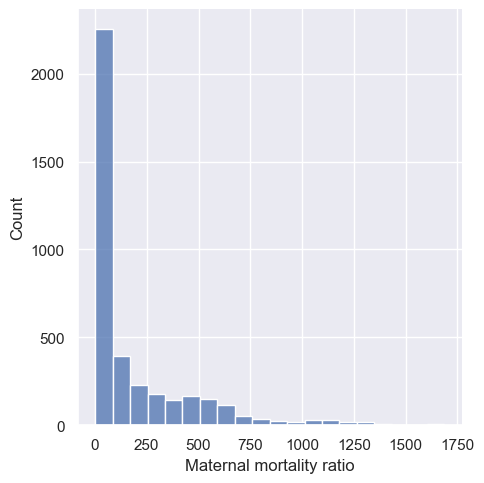

In [66]:
sns.displot(df0['Maternal mortality ratio'], bins=20)
plt.show()

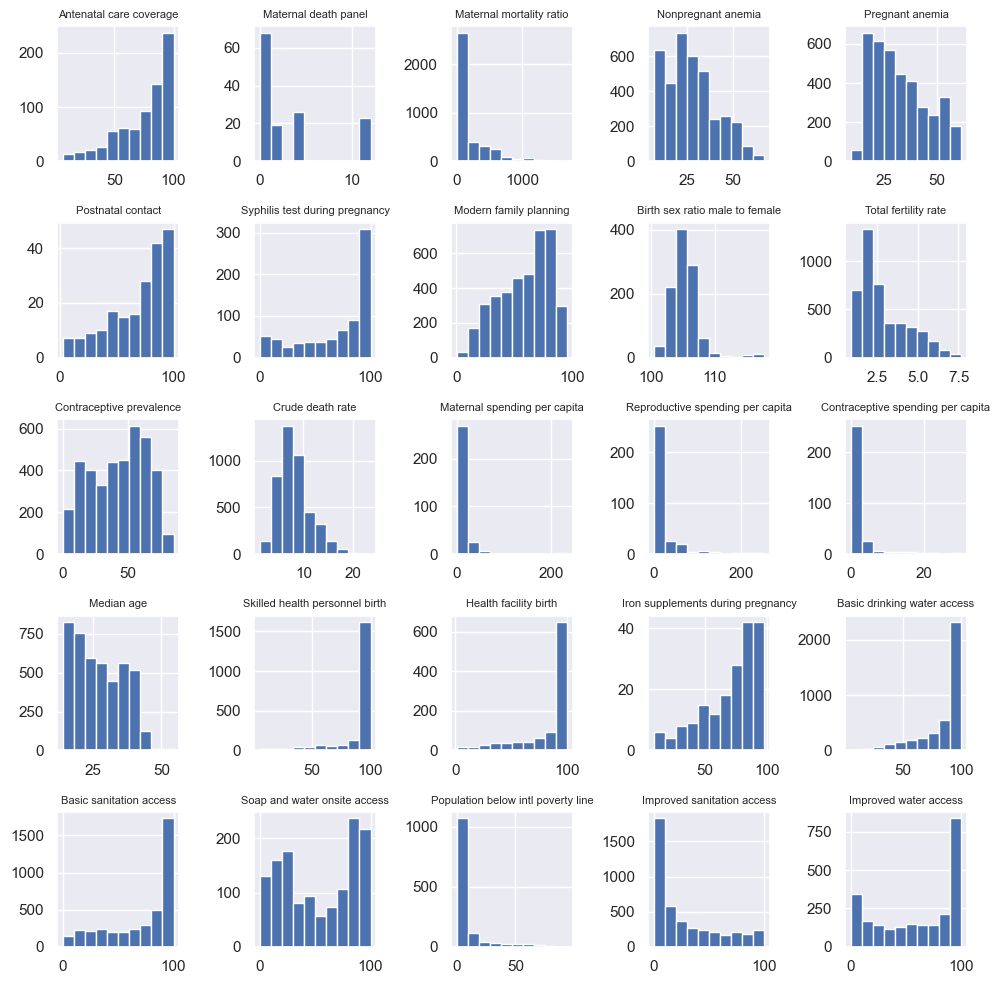

In [67]:
corrarray = dfcorr.hist()
[x.title.set_size(8) for x in corrarray.ravel()]
plt.tight_layout()
plt.show()
# Nothing is normally distributed

### Correlation exploration

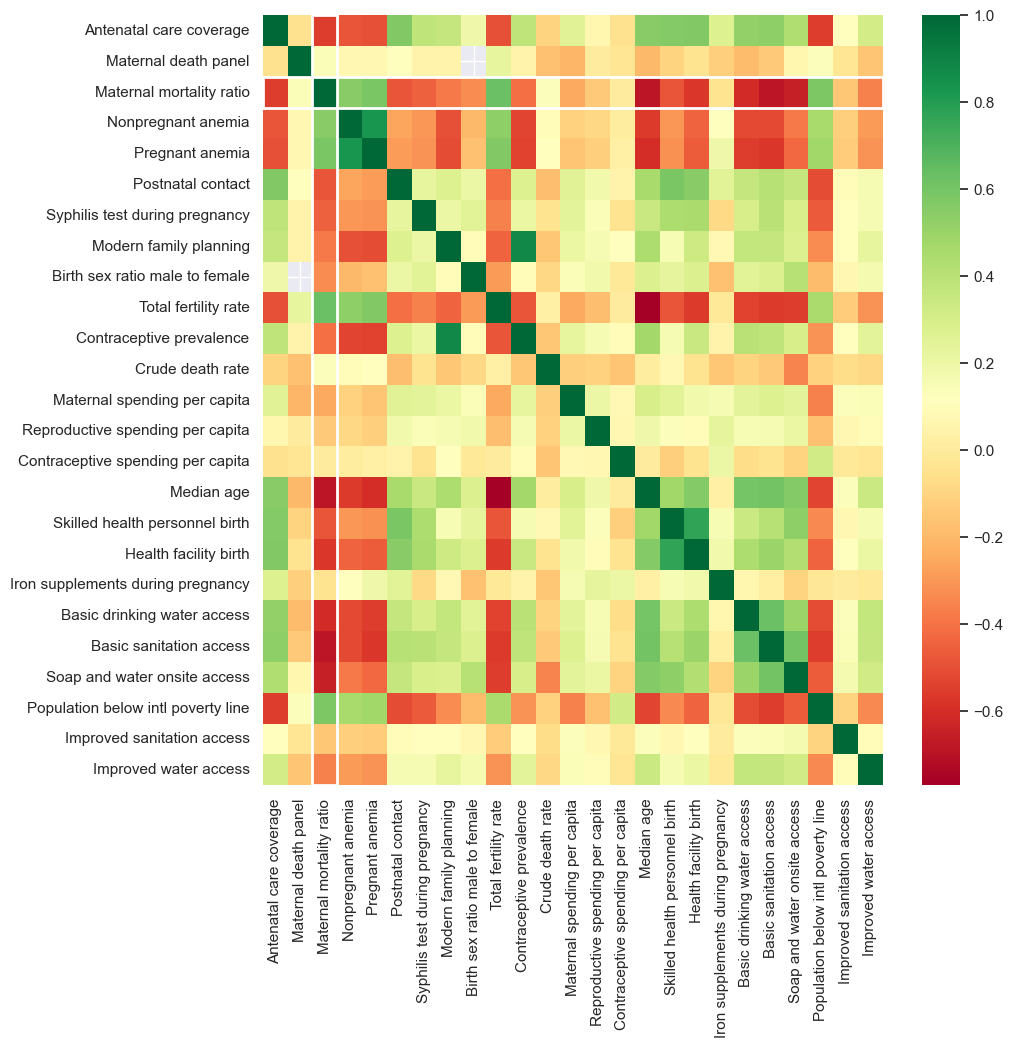

In [68]:
sns.set(rc={'figure.figsize':(10, 10)})
matrix = dfcorr.corr(method='kendall').round(2)
# Chose Kendall method over the default Pearson due to none of the data being normally distributed
plt_1 = sns.heatmap(matrix, annot=False, cmap=plt.get_cmap('RdYlGn'))
# I ended up not wanting the corr coefficients in the heatmap: `annot=True, annot_kws={"size": 8}, `
#plt_1 = plt.figure(figsize=(15, 15))
plt.axvline(x=2, linewidth=2, color='w')
plt.axvline(x=3, linewidth=2, color='w')
plt.axhline(y=0, xmin=0.08, xmax=0.12, linewidth=2, color='w')
plt.axhline(y=25, xmin=0.08, xmax=0.12, linewidth=2, color='w')
plt.axhline(y=2, linewidth=2, color='w')
plt.axhline(y=3, linewidth=2, color='w')
plt.axvline(x=0, ymin=0.88, ymax=0.92, linewidth=2, color='w')
plt.axvline(x=25, ymin=0.88, ymax=0.92, linewidth=2, color='w')
plt.show()

I've highlighted the maternal mortality ratio squares with a white border. There is a hole for maternal death panel and birth sex ratio because birth sex ratio was only polled every 5 years on years divisible by 5 and maternal death panel was only taken in 2018.

Parallels can be seen between maternal mortality ratio, nonpregnant anemia, pregnant anemia, total fertility rate, and population below the int'l poverty line, implying that they share a similar relationship to the other indicators.

Similarly, maternal mortality ratio colors seem to be the inverse of antenatal care coverage, postnatal contact, syphilis test during pregnancy, modern family planning, contraceptive prevalence, median age, skilled health personnel (during) birth, health facility birth, basic drinking water access, basic sanitation access, and soap and water onsite access.

Similar can also be said about maternal death panel, birth sex ratio, maternal spending per capita, reproductive spending per capita, contraceptive spending per capita, improved sanitation access, and improved water access, but these seem to be a lot weaker in their relationships to the other indicators.

Let's look at the p-values of the correlations with maternal mortality ratio. The default method for `pd.DataFrame.corr()` is Pearson, but I chose to use Kendall's Tau due to the data being mostly nonnormal, so let's proceed with Kendall's method. `scipy.stats.kendalltau()` also has the added bonus of being able to support `NaN` values via the `nan_policy` parameter. I want to stick to a significance level of 0.001 due to the size of the sample regardless of omission[[7](https://mpra.ub.uni-muenchen.de/66373/1/MPRA_paper_66373.pdf)][[8](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6314595/)].

In [69]:
# Omitted pearsonr method
#for i in range(len(df0)):
#    xl = df0['Maternal mortality ratio'].dropna()
#    ya = df0['Antenatal care coverage'].dropna()
#    da = pd.concat([xl,ya], axis = 1)
#    da = da.dropna()
#scipy.stats.pearsonr(da['Maternal mortality ratio'], da['Antenatal care coverage'])

In [70]:
# Omitted scipy.stats.kendalltau method as pingouin provides more information
#scipy.stats.kendalltau(df0['Maternal mortality ratio'], df0['Antenatal care coverage'], nan_policy='omit')
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Antenatal care coverage'], method='kendall')

,n,r,CI95%,p-val,power
kendall,718,-0.546737,"[-0.6, -0.49]",3.204308e-106,1.0


In [71]:
#scipy.stats.kendalltau(df0['Maternal mortality ratio'], df0['Maternal death panel'], nan_policy='omit')
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Maternal death panel'], method='kendall')
# I would rather consider this not a valuable correlation and a lack of a relationship even though the n is relatively low, due to the CI95% crossing from positive to negative
# I am also choosing to keep the consistency of my alpha being 0.001 despite the n being significantly smaller than other indicators

,n,r,CI95%,p-val,power
kendall,128,0.143896,"[-0.03, 0.31]",0.028112,0.369113


In [72]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Nonpregnant anemia'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3600,0.552094,"[0.53, 0.57]",0.0,1.0


In [73]:
# Concern for p-value of 0.0 leads to investigation
for i in range(len(df0)):
    xl = df0['Maternal mortality ratio'].dropna()
    yl = df0['Nonpregnant anemia'].dropna()
    dl = pd.concat([xl,yl], axis = 1)
    dl = dl.dropna()
dl.head(10)

,Maternal mortality ratio,Nonpregnant anemia
0,1346.14410,34.2
1,1273.43134,34.1
2,1277.30797,34.1
3,1196.09069,34.2
4,1114.88723,34.4
5,1102.80976,34.7
6,1044.40033,35.0
7,1023.49547,35.3
8,962.32152,35.6
9,913.03576,36.0


In [74]:
# Looks normal.
dl.tail(10)

,Maternal mortality ratio,Nonpregnant anemia
4378,618.32971,30.6
4379,562.12072,30.1
4380,527.61644,29.7
4381,495.25712,29.3
4382,440.85211,29.0
4383,408.11898,28.8
4384,399.75752,28.7
4385,366.38103,28.6
4386,358.50350,28.6
4387,393.17629,28.7


I was concerned that a p-value of 0.0 was an error at first, but upon further reading I found that a value can be so low that Python cannot distinguish it from floating value 0.0. This happens at numbers below 7.1429666685167604e-293 and can easily be produced if the number of points is above 1000[[8](https://stackoverflow.com/questions/20530138/scipy-p-value-returns-0-0)].

In [75]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Pregnant anemia'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3600,0.593814,"[0.57, 0.61]",0.0,1.0


In [76]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Postnatal contact'], method='kendall')

,n,r,CI95%,p-val,power
kendall,194,-0.47993,"[-0.58, -0.36]",3.050147e-23,1.0


In [77]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Syphilis test during pregnancy'], method='kendall')

,n,r,CI95%,p-val,power
kendall,716,-0.453612,"[-0.51, -0.39]",5.269057e-72,1.0


In [78]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Modern family planning'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3738,-0.381472,"[-0.41, -0.35]",1.607874e-267,1.0


In [81]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Birth sex ratio male to female'], method='kendall')

,n,r,CI95%,p-val,power
kendall,920,-0.332068,"[-0.39, -0.27]",1.447799e-50,1.0


In [82]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Total fertility rate'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3864,0.633388,"[0.61, 0.65]",0.0,1.0


In [83]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Contraceptive prevalence'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3738,-0.41411,"[-0.44, -0.39]",0.0,1.0


In [84]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Crude death rate'], method='kendall')
# Pretty weak correlation, but quite significant P-value. Tossed

,n,r,CI95%,p-val,power
kendall,3864,0.130088,"[0.1, 0.16]",7.923542e-34,1.0


In [85]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Maternal spending per capita'], method='kendall')
# Similar can be said here-- weak correlation, significant P-value

,n,r,CI95%,p-val,power
kendall,307,-0.248629,"[-0.35, -0.14]",8.180011e-11,0.993328


In [86]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Reproductive spending per capita'], method='kendall')
# P-value of 0.0002 is likely fine. Lowest alpha used is typically 0.001.
# It seems that the sample size is 316; alpha of 0.001 is reasonable and correlation falls within range of significance and statistical consideration.
# However, considering the CI95% goes to as weak as -0.03, I despise it, and will toss it as an insignificant relationship

,n,r,CI95%,p-val,power
kendall,316,-0.138646,"[-0.25, -0.03]",0.000237,0.695783


In [87]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Contraceptive spending per capita'], method='kendall')
# No correlation, no significance

,n,r,CI95%,p-val,power
kendall,301,0.000555,"[-0.11, 0.11]",0.988568,0.049957


In [88]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Median age'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3864,-0.692547,"[-0.71, -0.68]",0.0,1.0


In [89]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Skilled health personnel birth'], method='kendall')

,n,r,CI95%,p-val,power
kendall,2022,-0.484569,"[-0.52, -0.45]",1.029484e-227,1.0


In [90]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Health facility birth'], method='kendall')

,n,r,CI95%,p-val,power
kendall,1010,-0.569292,"[-0.61, -0.53]",2.979431e-159,1.0


In [91]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Iron supplements during pregnancy'], method='kendall')
# No correlation, not significant. This is not surprising when looking at the heatmap matrix, but surprising given blood loss is a major killer of pregnant women, and anemia is highly correlated to maternal death.
# Looking at the heatmap, iron supplements seem to have little correlation to anything, perhaps indicating there is either not substantial enough data, or they have little effect on health outcomes and there are more effective methods.

,n,r,CI95%,p-val,power
kendall,184,-0.037211,"[-0.18, 0.11]",0.453599,0.079244


In [92]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Basic drinking water access'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3799,-0.607357,"[-0.63, -0.59]",0.0,1.0


In [93]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Basic sanitation access'], method='kendall')

,n,r,CI95%,p-val,power
kendall,3798,-0.689549,"[-0.71, -0.67]",0.0,1.0


In [94]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Soap and water onsite access'], method='kendall')

,n,r,CI95%,p-val,power
kendall,1322,-0.651655,"[-0.68, -0.62]",1.375574e-275,1.0


In [95]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Population below intl poverty line'], method='kendall')

,n,r,CI95%,p-val,power
kendall,1341,0.580569,"[0.54, 0.61]",3.523519e-215,1.0


In [96]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Improved sanitation access'], method='kendall')
# Weak correlation, tossed

,n,r,CI95%,p-val,power
kendall,3808,-0.153034,"[-0.18, -0.12]",4.949003e-44,1.0


In [97]:
pg.corr(x=df0['Maternal mortality ratio'], y=df0['Improved water access'], method='kendall')

,n,r,CI95%,p-val,power
kendall,2122,-0.364553,"[-0.4, -0.33]",5.840149e-137,1.0


Here are all the indicators with an |r| > 0.3 and p-value < 0.001:

- Antenatal care coverage
- Nonpregnant anemia
- Pregnant anemia
- Postnatal contact
- Syphilis test during pregnancy
- Modern family planning
- Birth sex ratio
- Total fertility rate
- Contraceptive prevalence
- Median age
- Skilled health personnel birth
- Health facility birth
- Basic drinking water access
- Basic sanitation access
- Soap and water onsite access
- Population below intl poverty line
- Improved water access

Indicators where |r| CI95% upper bound > 0.5 and p-value < 0.001:

- Antenatal care coverage
- Nonpregnant anemia
- Pregnant anemia
- Postnatal contact \[-0.58, -0.36]
- Syphilis test during pregnancy \[-0.51, -0.39]
- Total fertility rate
- Median age
- Skilled health personnel birth \[-0.52, -0.45]
- Health facility birth
- Basic drinking water access
- Basic sanitation access
- Soap and water onsite access
- Population below intl poverty line

Now here are the indicators where |r| > 0.5 and p-value < 0.001:

- Antenatal care coverage
- Nonpregnant anemia
- Pregnant anemia
- Total fertility rate
- Median age
- Health facility birth
- Basic drinking water access
- Basic sanitation access
- Soap and water onsite access
- Population below intl poverty line

I'm under the impression that I don't have any absolute r values above 0.7 because I chose to use Kendall's Tau rather than Pearson's r, whereas I did before when I was trying out the Pearson test.

### Gender Inequality Index (GII) and Human Development Index (HDI)
****** I also want to do gender inequality index (modified to take out MMR) and human development index like souza et al did<br>
****** I also want to control for fertility rate as a potential confounding variable for other relationships-- poor countries tend to have more kids, raising the risk of maternal mortality.

### Longitudinal visualization/exploration
- ~income groups in line chart~
- income group countries in line chart*
- who region countries in each who region line chart*
- ~who regions pit against each other~
- ~global pit against each other~
- ** these both would be too much, so i may consider doing income groups from individual regions
- i also need to cite World bank to include a blurb on how income groups are sectioned
- i also would like to put global mmr and global hdi or gii over time on one fig :)

In [324]:
# These are long gone but I'm keeping them for a template for mmr!!!!
#mmnaf = mmn[mmn['WHO region'] == 'Africa']
#mmnam = mmn[mmn['WHO region'] == 'Americas']
#mmnem = mmn[mmn['WHO region'] == 'Eastern Mediterranean']
#mmneu = mmn[mmn['WHO region'] == 'Europe']
#mmnsa = mmn[mmn['WHO region'] == 'South-East Asia']
#mmnwp = mmn[mmn['WHO region'] == 'Western Pacific']

NameError: name 'mmnaf' is not defined

#### Number of maternal deaths

In [98]:
# Checking for Country null values to see if there is regional data
mmn[mmn['Country'].isna()]
# There seems to be no regional or global aggregate of maternal death count data

,Indicator,Year,Country,WHO region,World bank income group,Value Numeric,Value String,Value low,Value high


In [99]:
mmn['Country'].nunique()
# At 185 it looks as if we are missing quite a few countries.
# While I wonder what's missing, I'm not concerned enough to delve into it as the data is going to be aggregated into large masses

185

In [100]:
mmn.Country.value_counts()
# Each country represented has a value for each year of reported data-- good for a longitudinal viz

Country
Afghanistan        21
Paraguay           21
Niger              21
Nigeria            21
North Macedonia    21
                   ..
Ghana              21
Greece             21
Grenada            21
Guatemala          21
Zimbabwe           21
Name: count, Length: 185, dtype: int64

In [101]:
# Pivoting for usability
mmn_wide = (mmn.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
mmn_wide.head()

,Country,Year,WHO region,World bank income group,Number of maternal deaths
0,Afghanistan,2000,Eastern Mediterranean,Low income,13407.59524
1,Afghanistan,2001,Eastern Mediterranean,Low income,12339.54968
2,Afghanistan,2002,Eastern Mediterranean,Low income,12517.61812
3,Afghanistan,2003,Eastern Mediterranean,Low income,12714.44402
4,Afghanistan,2004,Eastern Mediterranean,Low income,12230.31294


In [195]:
# Using groupby and lambda to sum regional numbers together
mmn_region = (mmn_wide.groupby(['WHO region', 'Year'])
         .apply(lambda x: x['Number of maternal deaths'].sum(),
                include_groups=False)
         .reset_index(name='Regional MMN')
      )
mmn_region.head()

,WHO region,Year,Regional MMN
0,Africa,2000,211050.09814
1,Africa,2001,211617.17015
2,Africa,2002,212050.70087
3,Africa,2003,208743.34012
4,Africa,2004,208372.76956


In [196]:
# Not needed anymore!
# Creating str column for years so all will display rather than in staggered floats in plot
#mmn_region['YearS'] = mmn_region['Year'].astype(str)

In [197]:
# Looking at the regions
mmn_region['WHO region'].unique()

array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)

(1999.5, 2020.5)

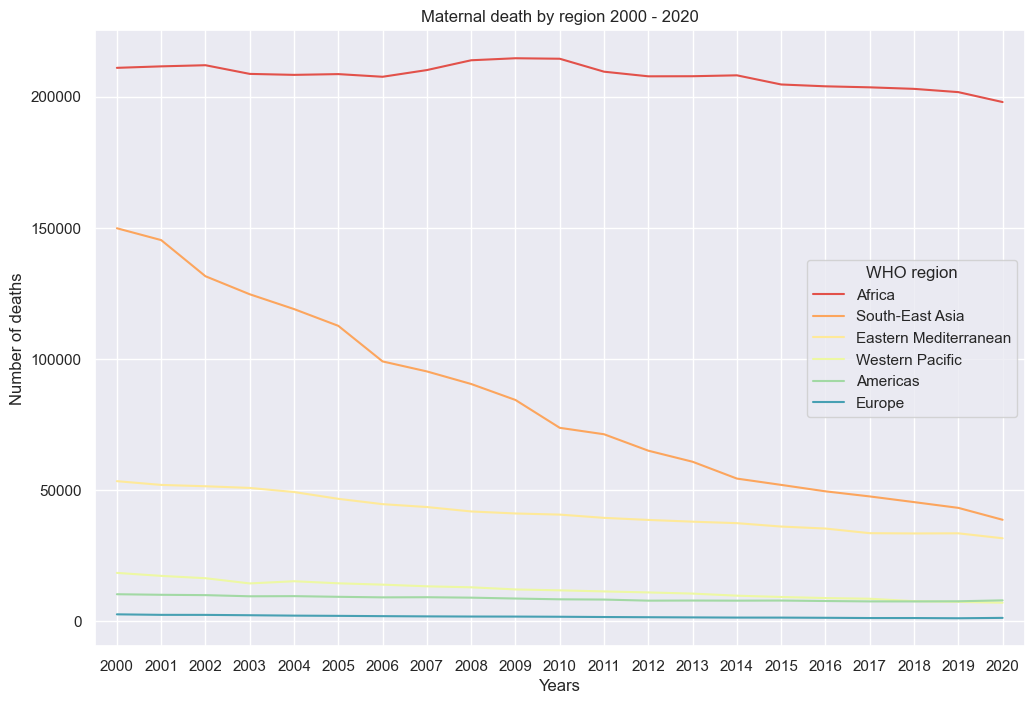

In [220]:
hue_order = ['Africa', 'South-East Asia', 'Eastern Mediterranean', 'Western Pacific', 'Americas', 'Europe']
sns.set_theme(rc={'figure.figsize':(12,8)}, palette=sns.color_palette("Spectral", 6))
ax = sns.lineplot(data=mmn_region, x='Year', y='Regional MMN', hue='WHO region', hue_order=hue_order)
ax.set_title('Maternal death by region 2000 - 2020')
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)

In [106]:
# Just another plotting method
# rcParams['figure.figsize'] = 12,8
# ax = sns.lineplot(x="YearS", 
#                  y="Regional MMN", 
#                  hue="WHO region", 
#                  lw=1, 
#                  data=mmn_region, 
#                  palette=sns.color_palette('OrRd_d', n_colors=6), 
#                  legend="brief")

In [126]:
mmn_global = (mmn_region.groupby('Year')
         .apply(lambda x: x['Regional MMN'].sum(),
                include_groups=False)
         .reset_index(name='Global MMN')
      )
mmn_global['Global MMN'] = round(mmn_global['Global MMN'], 0).astype(int)
mmn_global.head()

,Year,Global MMN
0,2000,445886
1,2001,438956
2,2002,424069
3,2003,410689
4,2004,403845


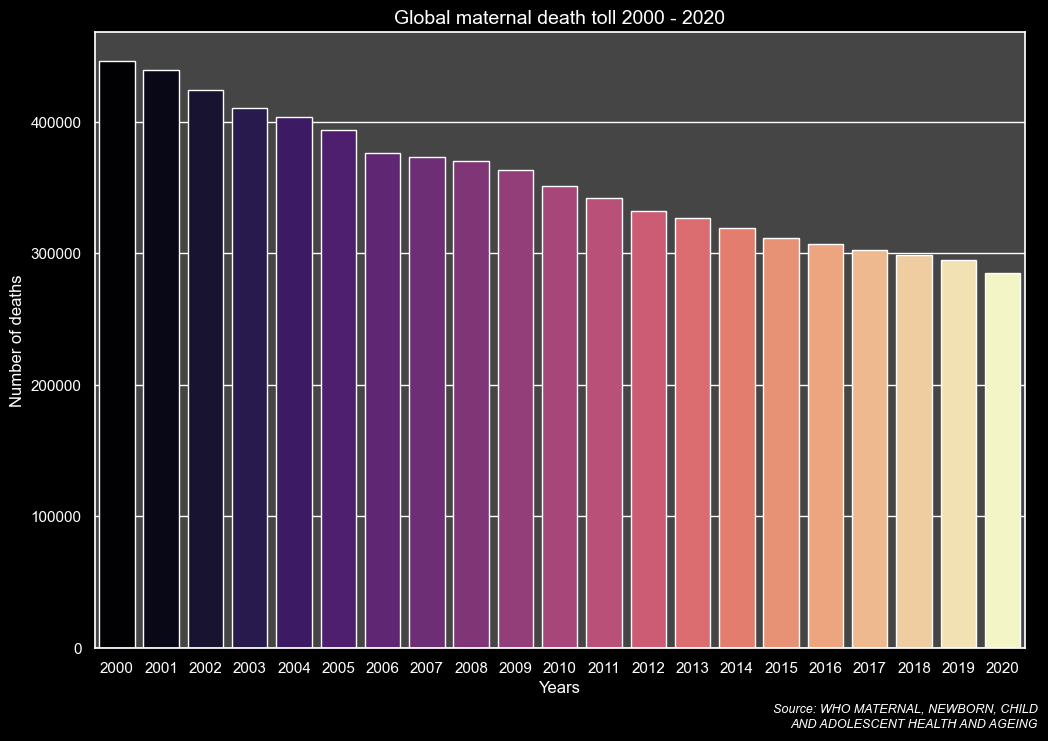

In [236]:
sns.set(rc={'axes.facecolor':'#454545', 'figure.facecolor':'black'})
ax2 = sns.barplot(data=mmn_global, x='Year', y='Global MMN', hue='Year', palette='magma')
ax2.set_title('Global maternal death toll 2000 - 2020', size=14)
ax2.set_ylabel('Number of deaths')
ax2.set_xlabel('Years')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.xaxis.label.set_color('white')
ax2.yaxis.label.set_color('white')
ax2.title.set_color('white')
ax2.tick_params(colors='white', which='both')
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, c='white', style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, c='white', style='italic')
ax2.get_legend().remove()

#### Maternal mortality ratio

In [136]:
# Just looking
mmr[mmr['Indicator'] == 'Number of births (thousands)'].head()

,Indicator,Year,Country,Global,WHO region,SDG region,World bank income group,Comments,Value Numeric,Value String,Value low,Value high
3885,Number of births (thousands),2000,NaN,NaN,NaN,NaN,Upper middle income,(h) The country classification by income level...,36414.563,36414.563,NaN,NaN
3886,Number of births (thousands),2000,NaN,NaN,NaN,Australia and New Zealand,NaN,NaN,302.557,302.557,NaN,NaN
3887,Number of births (thousands),2000,NaN,NaN,NaN,Latin America & the Caribbean,NaN,NaN,11598.272,11598.272,NaN,NaN
3888,Number of births (thousands),2000,NaN,NaN,NaN,Western Asia and Northern Africa,NaN,NaN,9296.110,9296.11,NaN,NaN
3889,Number of births (thousands),2000,NaN,NaN,NaN,Sub-Saharan Africa,NaN,NaN,26692.957,26692.957,NaN,NaN


In [137]:
mmr['Country'].nunique()
# That's a lot of countries

234

In [138]:
mmr.Country.value_counts()
# Some of these countries only have data for one indicator; either number of births or MMR

Country
Afghanistan        42
Paraguay           42
Niger              42
Nigeria            42
North Macedonia    42
                   ..
Greenland          21
Guadeloupe         21
Guam               21
Holy See           21
Western Sahara     21
Name: count, Length: 234, dtype: int64

In [139]:
mmr_wide = (mmr.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
mmr_wide.head()

,Country,Year,WHO region,World bank income group,Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Number of births (thousands)
0,Afghanistan,2000,Eastern Mediterranean,Low income,1346.14410,1024.429
1,Afghanistan,2001,Eastern Mediterranean,Low income,1273.43134,1049.687
2,Afghanistan,2002,Eastern Mediterranean,Low income,1277.30797,1072.576
3,Afghanistan,2003,Eastern Mediterranean,Low income,1196.09069,1093.826
4,Afghanistan,2004,Eastern Mediterranean,Low income,1114.88723,1113.500


In [140]:
mmr_wide = mmr_wide.rename(columns={'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'MMR',
                                  'Number of births (thousands)':'Birth Count'})
mmr_wide.head()

,Country,Year,WHO region,World bank income group,MMR,Birth Count
0,Afghanistan,2000,Eastern Mediterranean,Low income,1346.14410,1024.429
1,Afghanistan,2001,Eastern Mediterranean,Low income,1273.43134,1049.687
2,Afghanistan,2002,Eastern Mediterranean,Low income,1277.30797,1072.576
3,Afghanistan,2003,Eastern Mediterranean,Low income,1196.09069,1093.826
4,Afghanistan,2004,Eastern Mediterranean,Low income,1114.88723,1113.500


In [ ]:
# Long version not using lambda
#mmr_wide['calc'] = mmr_wide['MMR'] * mmr_wide['Birth Count']
#mmr_region = mmr_wide.groupby(['WHO region', 'Year']).sum()
#mmr_region['Region MMR'] = mmr_region['calc']/mmr_region['Birth Count']
#mmr_region = mmr_region.reset_index().rename_axis(None, axis=1)
#mmr_region = mmr_region.drop(columns=['Country', 'World bank income group', 'MMR', 'Birth Count', 'calc'])

In [172]:
# Creating regional data by weighting each country's MMR by their annual birth count
mmr_region = (mmr_wide.groupby(['WHO region', 'Year'])
         .apply(lambda x: (x['MMR']*x['Birth Count']).sum()/x['Birth Count'].sum(),
                include_groups=False)
         .reset_index(name='MMR')
      )
mmr_region.head()

,WHO region,Year,MMR
0,Africa,2000,775.597519
1,Africa,2001,759.714907
2,Africa,2002,744.618084
3,Africa,2003,718.425387
4,Africa,2004,701.597200


Text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING')

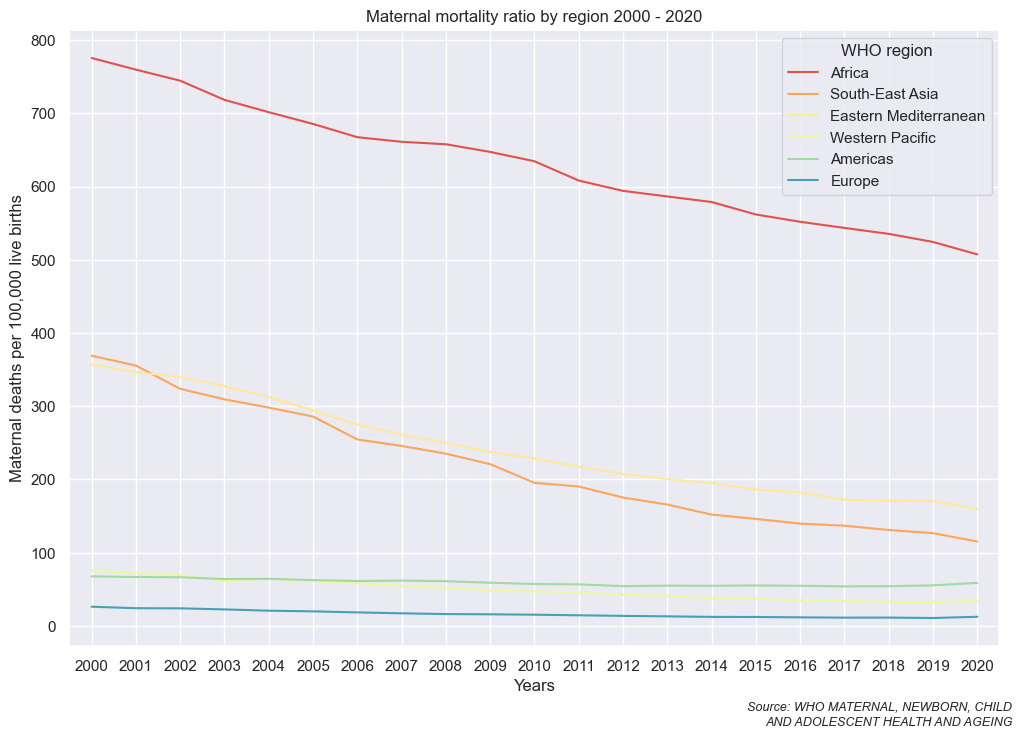

In [309]:
sns.set_theme(palette=sns.color_palette('Spectral', 6))
ax3 = sns.lineplot(data=mmr_region, x='Year', y='MMR', hue='WHO region', hue_order=hue_order)
ax3.set_title('Maternal mortality ratio by region 2000 - 2020')
ax3.set_ylabel('Maternal deaths per 100,000 live births')
ax3.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, style='italic')
#plt.fill_between(mmr_region.YearS.values, mmr_region.MMR.values)

The graph shows a promising trend for Africa, South-East Asia, and the Eastern Mediterranean, but the same cannot be so much said for the other three regions. Africa is falling steadily despite MMN remaining somewhat stable through the time period; this can only be because of the region's actively growing population.

The following is a similar graph of the individual countries data grouped into WHO regions, but unweighted and with a 95% CI.

Text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING')

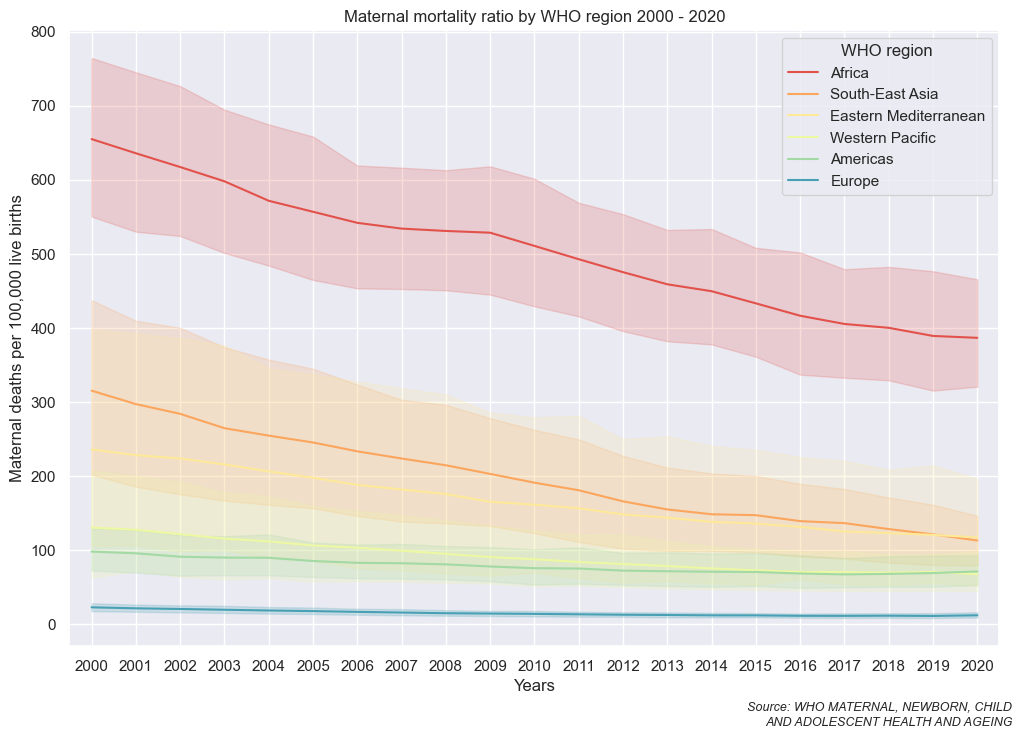

In [321]:
ax4 = sns.lineplot(data=df0, x='Year', y='Maternal mortality ratio', hue='WHO region', hue_order=hue_order)
ax4.set_title('Maternal mortality ratio by WHO region 2000 - 2020')
ax4.set_ylabel('Maternal deaths per 100,000 live births')
ax4.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, style='italic')
#ax6.get_legend().remove()

Unweighted, the graph definitely has small differences.  Let's look at the three regions that have had an increase in MMR in recent years.

In [255]:
mmr_region.loc[mmr_region['WHO region'] == 'Americas']

,WHO region,Year,MMR,YearS
84,Americas,2000,67.618931,2000
85,Americas,2001,66.770893,2001
86,Americas,2002,66.401639,2002
87,Americas,2003,63.917242,2003
88,Americas,2004,64.273145,2004
89,Americas,2005,62.546194,2005
90,Americas,2006,61.242868,2006
91,Americas,2007,61.852224,2007
92,Americas,2008,61.066180,2008
93,Americas,2009,58.937636,2009


The Americas, at second lowest for MMR, has countries with a range of income levels and stages of development. From 2012 onwards, the Americas have had a shaky relationship with reducing MMR at best. Let's take a closer look at them.

In [257]:
out = mmr[mmr['WHO region'] == 'Americas']
out['Country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados',
       'Belize', 'Bolivia (Plurinational State of)', 'Brazil', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana',
       'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
       'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'United States of America', 'Uruguay',
       'Venezuela (Bolivarian Republic of)', 'Anguilla', 'Aruba',
       'Bermuda', 'Bonaire, Saint Eustatius and Saba',
       'British Virgin Islands', 'Cayman Islands', 'Curaçao', 'Dominica',
       'Montserrat', 'Saint Kitts and Nevis', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'United States Virgin Islands'],
      dtype=object)

In [254]:
out = mmr[mmr['WHO region'] == 'Americas']
out = (out.pivot_table(index=['World bank income group'],
                      values='Country', 
                      aggfunc=lambda x: len(x.unique()))
        .reset_index()
        .rename_axis(None, axis=1))
out

,World bank income group,Country
0,High income,20
1,Lower middle income,4
2,Upper middle income,19


In [170]:
mmr_region.loc[mmr_region['WHO region'] == 'Europe']

,WHO region,Year,Regional MMR,YearS
63,Europe,2000,26.180129,2000
64,Europe,2001,24.134792,2001
65,Europe,2002,23.972022,2002
66,Europe,2003,22.521261,2003
67,Europe,2004,20.741356,2004
68,Europe,2005,19.843336,2005
69,Europe,2006,18.434637,2006
70,Europe,2007,17.158378,2007
71,Europe,2008,16.141007,2008
72,Europe,2009,15.801862,2009


Europe has the lowest MMR of all the regions and struggles to make more progress in the recent years; there is a small increase in between 2017 and 2018, and a substantial one in between 2019 and 2020, likely attributable to COVID-19.

In [258]:
out = mmr[mmr['WHO region'] == 'Europe']
out['Country'].unique()

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Montenegro',
       'Netherlands (Kingdom of the)', 'North Macedonia', 'Norway',
       'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Tajikistan', 'Türkiye', 'Turkmenistan',
       'Ukraine', 'United Kingdom of Great Britain and Northern Ireland',
       'Uzbekistan', 'Andorra', 'Greenland', 'Monaco', 'San Marino'],
      dtype=object)

In [252]:
out = mmr[mmr['WHO region'] == 'Europe']
out = (out.pivot_table(index=['World bank income group'],
                      values='Country', 
                      aggfunc=lambda x: len(x.unique()))
        .reset_index()
        .rename_axis(None, axis=1))
out

,World bank income group,Country
0,High income,35
1,Lower middle income,4
2,Upper middle income,15


In [171]:
mmr_region.loc[mmr_region['WHO region'] == 'Western Pacific']

,WHO region,Year,Regional MMR,YearS
105,Western Pacific,2000,75.204936,2000
106,Western Pacific,2001,72.745782,2001
107,Western Pacific,2002,69.554387,2002
108,Western Pacific,2003,61.338556,2003
109,Western Pacific,2004,64.511539,2004
110,Western Pacific,2005,60.876973,2005
111,Western Pacific,2006,58.032129,2006
112,Western Pacific,2007,54.523895,2007
113,Western Pacific,2008,52.008269,2008
114,Western Pacific,2009,48.151847,2009


Western Pacific only spiked between 2019 and 2020-- this is perhaps attributable to COVID-19

In [253]:
# What countries are in the Western Pacific WHO region?
out = mmr[mmr['WHO region'] == 'Western Pacific']
out['Country'].unique()

array(['Australia', 'Brunei Darussalam', 'Cambodia', 'China', 'Fiji',
       'Japan', 'Kiribati', "Lao People's Democratic Republic",
       'Malaysia', 'Micronesia (Federated States of)', 'Mongolia',
       'New Zealand', 'Papua New Guinea', 'Philippines',
       'Republic of Korea', 'Samoa', 'Singapore', 'Solomon Islands',
       'Tonga', 'Vanuatu', 'Viet Nam', 'American Samoa',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Cook Islands',
       'French Polynesia', 'Guam', 'Marshall Islands', 'Nauru',
       'New Caledonia', 'Niue', 'Northern Mariana Islands', 'Palau',
       'Tokelau', 'Tuvalu', 'Wallis and Futuna'], dtype=object)

Interesting that WHO would include Lao, Cambodia, and Viet Nam in this group while South-East Asia has Thailand, all of which are typically considered part of SEA. The South-East Asia WHO region also includes a large range of South Asian countries; my understanding is this is to balance the regions by number of countries and income groups.

In [260]:
out = mmr[mmr['WHO region'] == 'Western Pacific']
out = (out.pivot_table(index=['World bank income group'],
                      values='Country', 
                      aggfunc=lambda x: len(x.unique()))
        .reset_index()
        .rename_axis(None, axis=1))
out

,World bank income group,Country
0,High income,14
1,Lower middle income,11
2,Upper middle income,7


In [179]:
# Creating global data using the same method, by weighting each country's MMR by their annual birth count
mmr_global = (mmr_wide.groupby(['Year'])
         .apply(lambda x: (x['MMR']*x['Birth Count']).sum()/x['Birth Count'].sum(),
                include_groups=False)
         .reset_index(name='MMR')
      )
mmr_global.head()

,Year,MMR
0,2000,333.440349
1,2001,326.754968
2,2002,314.933952
3,2003,303.827175
4,2004,297.478741


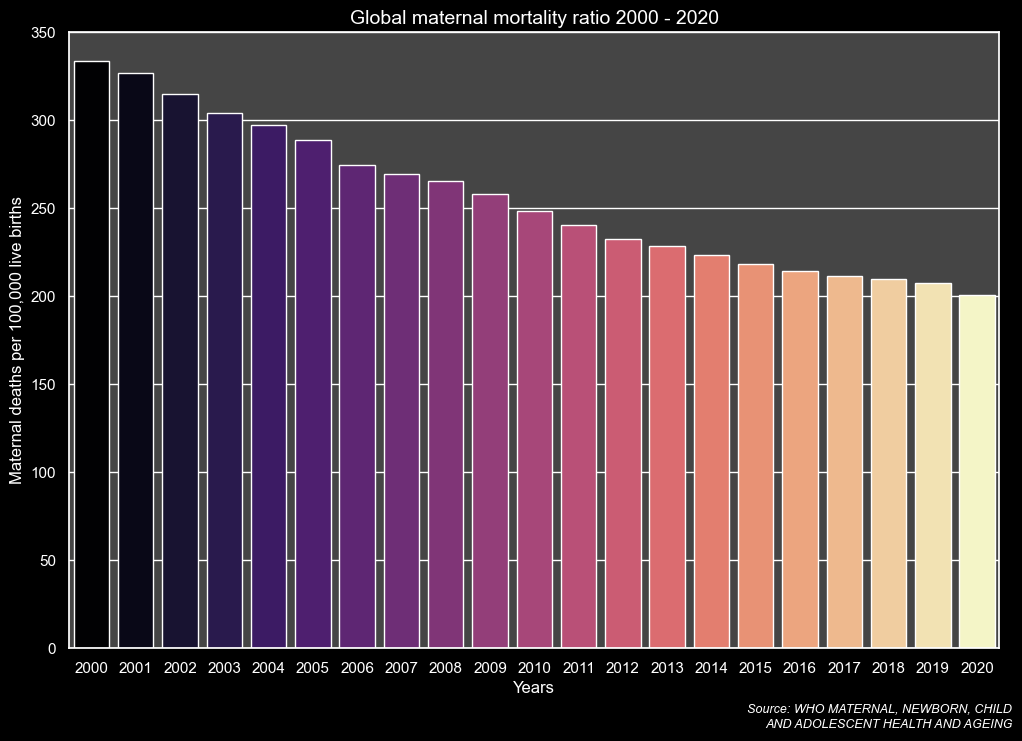

In [262]:
sns.set(rc={'axes.facecolor':'#454545', 'figure.facecolor':'black'})
ax5 = sns.barplot(data=mmr_global, x='Year', y='MMR', hue='Year', palette='magma')
ax5.set_title('Global maternal mortality ratio 2000 - 2020', size=14)
ax5.set_ylabel('Maternal deaths per 100,000 live births')
ax5.set_xlabel('Years')
ax5.spines['bottom'].set_color('white')
ax5.spines['top'].set_color('white') 
ax5.spines['right'].set_color('white')
ax5.spines['left'].set_color('white')
ax5.xaxis.label.set_color('white')
ax5.yaxis.label.set_color('white')
ax5.title.set_color('white')
ax5.tick_params(colors='white', which='both')
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, c='white', style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, c='white', style='italic')
ax5.get_legend().remove()

In [149]:
mmr_income = (mmr_wide.groupby(['World bank income group', 'Year'])
         .apply(lambda x: (x['MMR']*x['Birth Count']).sum()/x['Birth Count'].sum(),
                include_groups=False)
         .reset_index(name='MMR')
      )

In [155]:
sorter = ['Low income', 'Lower middle income', 'Upper middle income', 'High income', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
mmr_income.sort_values(by=['World bank income group', 'Year'], key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

In [161]:
mmr_income = mmr_income.reset_index(drop=True)

In [162]:
mmr_income.head()

,World bank income group,Year,MMR
0,Low income,2000,767.879615
1,Low income,2001,749.056725
2,Low income,2002,738.834259
3,Low income,2003,705.447297
4,Low income,2004,680.757830


In [163]:
mmr_income.tail()

,World bank income group,Year,MMR
79,High income,2016,11.324396
80,High income,2017,11.497913
81,High income,2018,11.593704
82,High income,2019,11.690240
83,High income,2020,12.149030


In [164]:
mmr_income.loc[mmr_income['Year'] == 2000]

,World bank income group,Year,MMR
0,Low income,2000,767.879615
21,Lower middle income,2000,437.281986
42,Upper middle income,2000,94.255448
63,High income,2000,12.735710


In [165]:
mmr_income.loc[mmr_income['Year'] == 2020]
# We can see between the two tables the developments over the last 20 years. MMR has gone down substantially for all income groups except high income.

,World bank income group,Year,MMR
20,Low income,2020,408.039514
41,Lower middle income,2020,249.381807
62,Upper middle income,2020,57.306179
83,High income,2020,12.149030


In [261]:
# We'll look at 2019 for another representation of progress unaffected by COVID-19, though this will only positively impact High Income group.
mmr_income.loc[mmr_income['Year'] == 2019]
# It's so impressive and substantial that all income groups but high income have almost halved their MMR in the last 20 years.
# This trend can only be continued via active participation in global health initiatives

,World bank income group,Year,MMR
19,Low income,2019,414.554112
40,Lower middle income,2019,265.782595
61,Upper middle income,2019,52.021196
82,High income,2019,11.690240


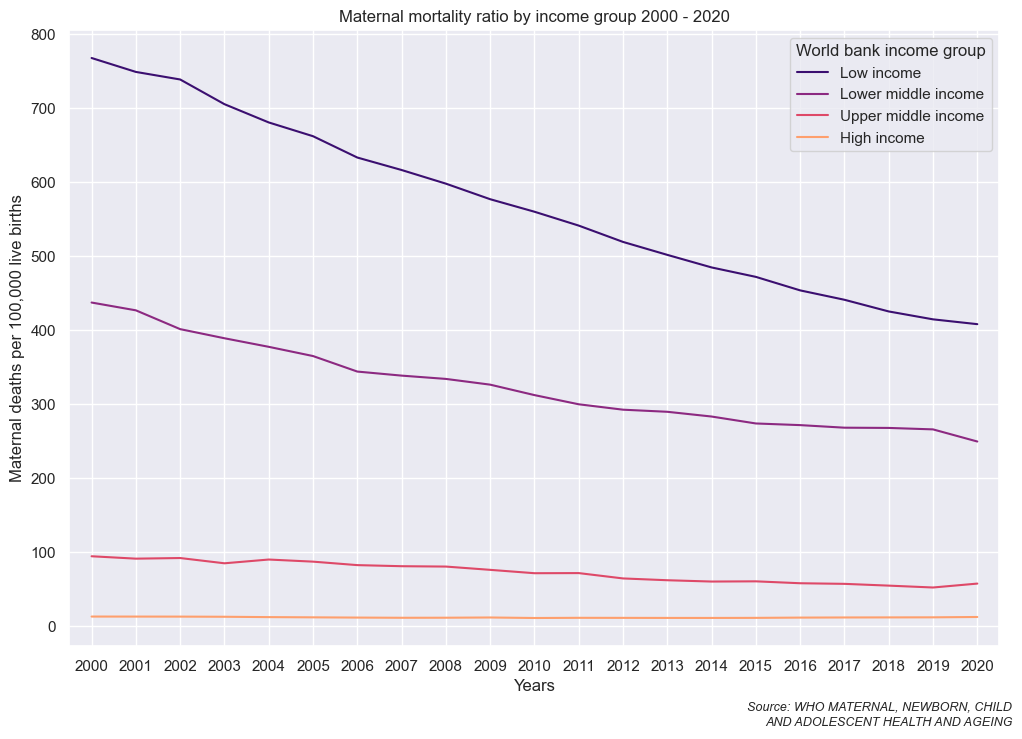

In [308]:
sns.set_theme(palette=sns.color_palette('magma', 4))
ax6 = sns.lineplot(data=mmr_income, x='Year', y='MMR', hue='World bank income group')
ax6.set_title('Maternal mortality ratio by income group 2000 - 2020')
ax6.set_ylabel('Maternal deaths per 100,000 live births')
ax6.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, style='italic')
#line = ax6.get_lines()
#plt.fill_between(line[0].get_xdata(), line[0].get_ydata(), line[1].get_ydata(), color='blue', alpha=.2)
#plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='purple', alpha=.3)
#plt.fill_between(line[0].get_xdata(), line[2].get_ydata(), line[3].get_ydata(), color='tomato', alpha=.4)
#plt.fill_between(line[0].get_xdata(), line[3].get_ydata(), y2=0, color='sandybrown', alpha=.5)

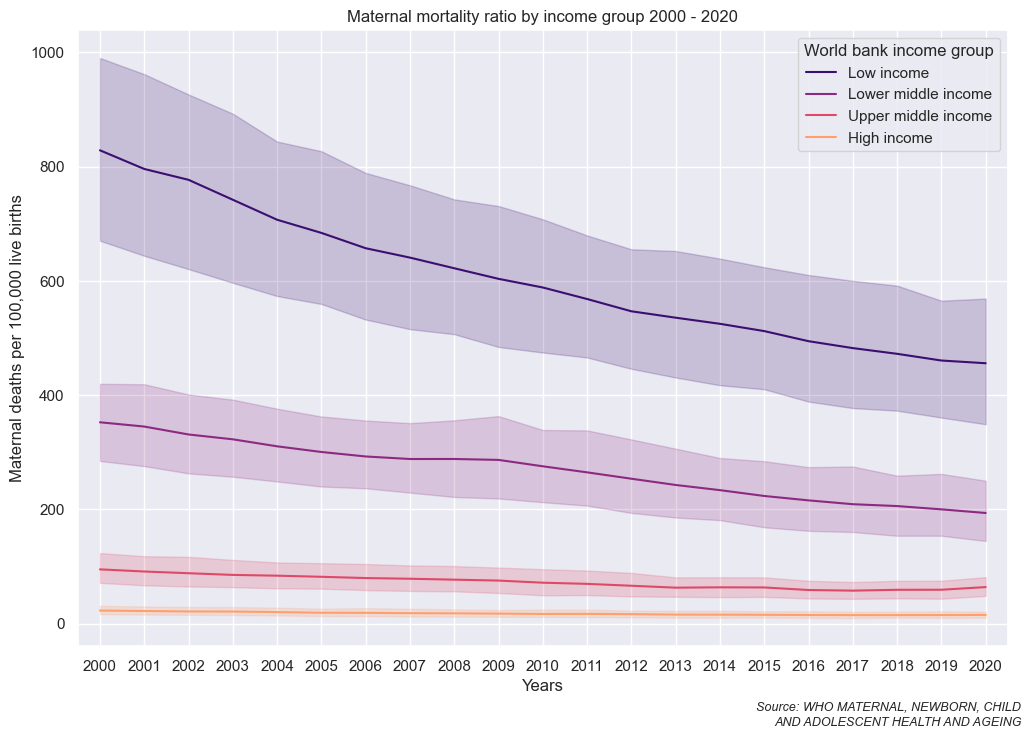

In [323]:
# Same as the MMR regional data, I made a similar graph from the individual countries data with a 95% CI.
hue_order2 = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
sns.set_theme(palette=sns.color_palette('magma', 4))
ax7 = sns.lineplot(data=df0, x='Year', y='Maternal mortality ratio', hue='World bank income group', hue_order=hue_order2)
ax7.set_title('Maternal mortality ratio by income group 2000 - 2020')
ax7.set_ylabel('Maternal deaths per 100,000 live births')
ax7.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, style='italic')

#### Other indicators

In [ ]:
#mmrhfb = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')
# for overlay later i am lazy rn

##### Health facility birth

Text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING')

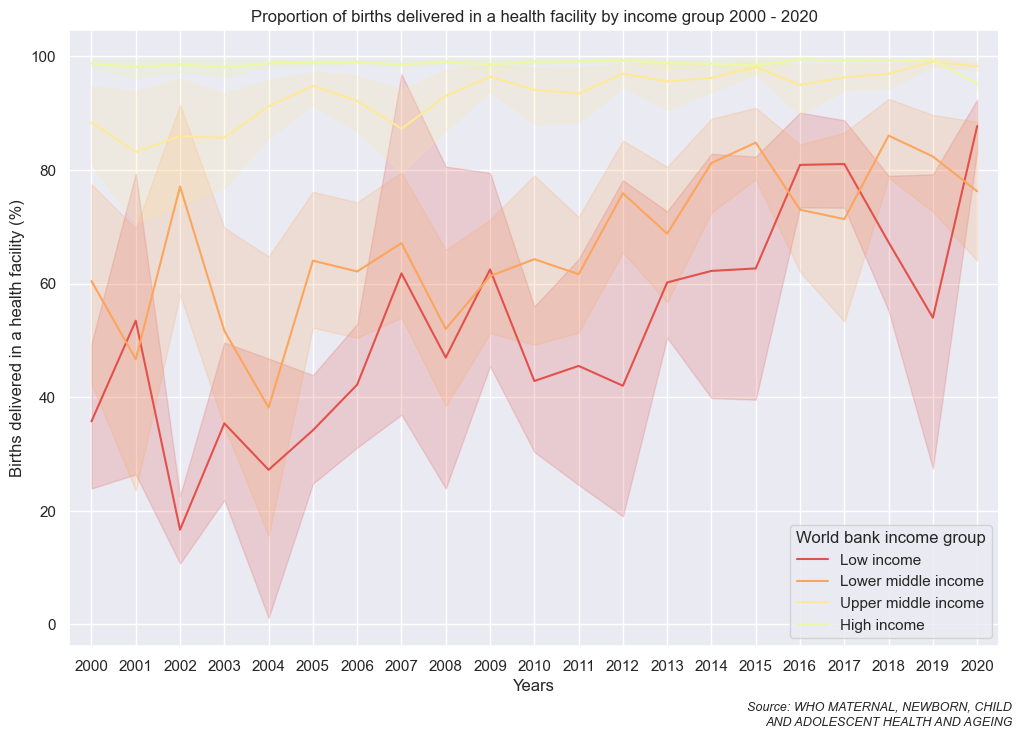

In [316]:
ax8 = sns.lineplot(data=df0, x='Year', y='Health facility birth', hue='World bank income group', hue_order=hue_order2)
ax8.set_title('Proportion of births delivered in a health facility by income group 2000 - 2020')
ax8.set_ylabel('Births delivered in a health facility (%)')
ax8.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, style='italic')
#ax8.get_legend().remove()
# This is a mess

Text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING')

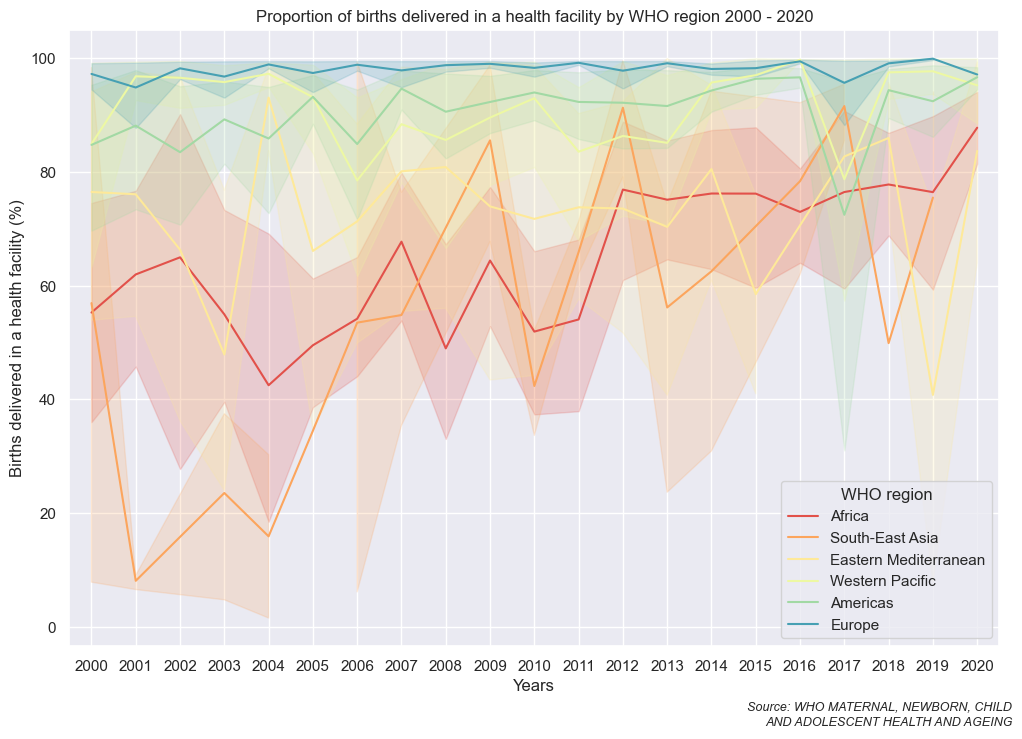

In [319]:
ax9 = sns.lineplot(data=df0, x='Year', y='Health facility birth', hue='WHO region', hue_order=hue_order)
ax9.set_title('Proportion of births delivered in a health facility by WHO region 2000 - 2020')
ax9.set_ylabel('Births delivered in a health facility (%)')
ax9.set_xlabel('Years')
plt.locator_params(axis='x', nbins=22)
plt.xlim(1999.5, 2020.5)
plt.gcf().text(0.69, 0.03, 'Source: WHO MATERNAL, NEWBORN, CHILD', fontsize=9, style='italic')
plt.gcf().text(0.705, 0.01, 'AND ADOLESCENT HEALTH AND AGEING', fontsize=9, style='italic')
# This is also a mess. Maybe because of inconsistent country participation per year? Let's weight them and see.

TypeError: unhashable type: 'list'